# 2. Обзор типов визуализации

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ЛИНЕЙНЫЙ ГРАФИК (LINEPLOT)

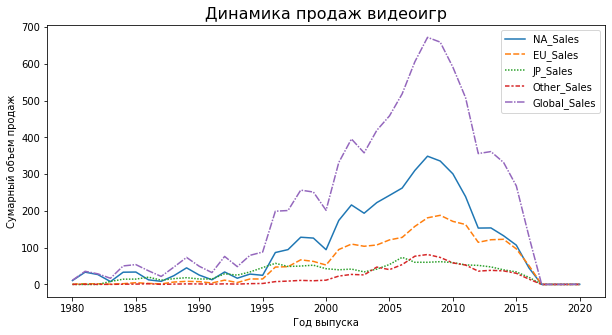

In [ ]:
vg_data = pd.read_csv('/content/sample_data/vgsales.csv')
dinamic_by_region = vg_data[
        ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']
].groupby('Year_of_Release').sum()

fig = plt.figure(figsize=(10, 5))
lineplot = sns.lineplot(data=dinamic_by_region)
lineplot.set_title('Динамика продаж видеоигр', fontsize=16)
lineplot.set_xlabel('Год выпуска')
lineplot.set_ylabel('Сумарный объем продаж');

Представляет собой последовательность точек, соединенных линией. Каждая точка - это пара координат x и y, которые отображены по осям абсцисс и ординат (в двумерном случае). 

На практике в Data Science такие графики чаще всего используются для визуализации временных рядов, например, чтобы отследить динамику продаж во времени, число активных пользователей по дням, изменение курса валют и акций. 
График особенно бывает полезен, когда вы пытаетесь спрогнозировать ряд и вам необходимо увидеть свой прогноз на графике и сравнить его с действительностью.




---


## ГИСТОГРАММА (HISTOGRAM)

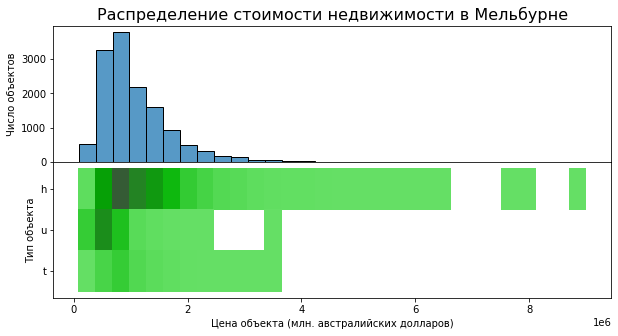

In [ ]:
melb_data = pd.read_csv('/content/sample_data/melb_data.csv')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data, 
    x='Price', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение стоимости недвижимости в Мельбурне', fontsize=16)
histplot1.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot1.set_ylabel('Число объектов')

histplot2 = sns.histplot(
    data=melb_data,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot2.set_ylabel('Тип объекта');

Гистограмма - это способ визуализации частоты попадания признака в некоторый численный интервал. Гистограмма состоит из прямоугольников, расположенных вдоль оси x. Ось разбита на интервалы, их еще называют корзинами (bins), их число задается пользователем. Ширина интервалов одинакова и задает ширину прямоугольника. По оси y откладывается высота прямоугольника - количество наблюдений, которые попали в интервал, чем выше столбик, тем больше наблюдений находятся в интервале.

Гистограммы часто используются для оценки распределения числового признака, например, мы можем понять как распределены цены на товары, число шагов, которые делает пользователь умных часов, масса метеоритов, падающих на землю.



---


## ДИАГРАММА РАССЕЯНИЯ (SCATTERPLOT)

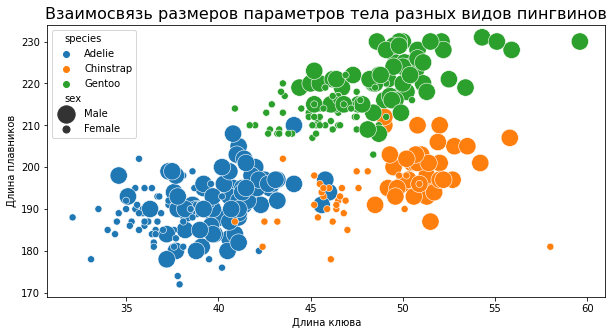

In [ ]:
penguins_df = sns.load_dataset("penguins")

fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=penguins_df,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='species',
    s=100,
    size='sex',
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь размеров параметров тела разных видов пингвинов', fontsize=16)
scatterplot.set_xlabel('Длина клюва')
scatterplot.set_ylabel('Длина плавников');

График представляет собой облака точек, по оси абсцисс откладывается одна числовая переменная, а по оси ординат - вторая, а каждая точка на графике - это запись из таблицы. 

Диаграммы рассеяния являются стандартным средством визуализации связи между двумя числовыми переменными. Однако, покопавшись в настройках графика, в исследование зависимости можно добавить и несколько категориальных переменных.

Диаграммы рассеяния являются мощным инструментом, который очень широко используется в Data Science. С помощью нее мы можем увидеть как зависит (или не зависит) давление от возраста пациента, объем продаж товаров от количества показанной рекламы и т.д. 
Оценив взаимосвязь признаков, мы можем принять решение, использовать ли какой-то из признаков для предсказания или нет.




---


## КОРОБЧАТАЯ ДИАГРАММА (BOXPLOT, BOX AND WHISKER PLOT)

Коробчатые диаграммы, которые были введены в употребление Тьюки в 1977 году, являются новым типом диаграмм для исследования распределения числового признака по отношению к предыдущим. Диаграмма основана на понятии квантилей. Приведем общую схему построения диаграммы:


Основные составляющие графика:
1. **Ящик или коробка**. Левая граница коробки соответствует значению Q25, правая - Q75, а линия внутри коробки - медиане. Ширина ящика называется межквартильным размахом (Interquartile range) и вычисляется как IQR = Q75 -Q25. 
2. **Усы ящика**, длина которых равна 1.5 IQR. Крайние точки усов часто обозначаются в литературе как “min” и “max” и называются границами распределения. Фактически эти точки не всегда являются истинными минимумом и максимумом признака.
3. **Потенциальные выбросы** - точки лежащие за пределами границ. Согласно теории Тьюки эти точки следует считать аномалиями и они подлежат исключению из данных. Однако, на практике так бывает не всегда и необходимо проводить дополнительное исследование. Об этом мы будем говорить подробнее в модуле по очистке данных.

<img src= https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/изображение_2021-09-20_112110.png >

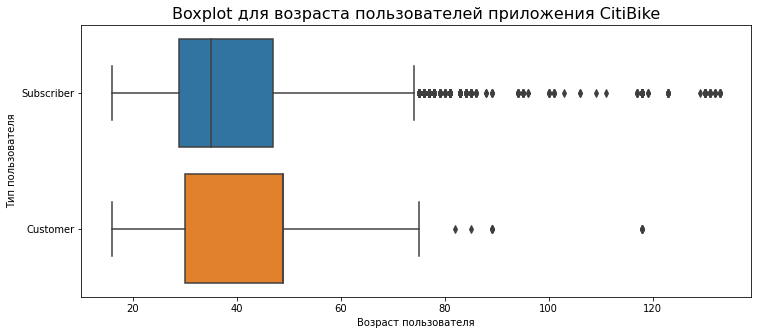

In [ ]:
citibike_df = pd.read_csv('data/citibike-tripdata.csv')
citibike_df['age'] = 2018 - citibike_df['birth year']

fig = plt.figure(figsize=(12, 5))
boxplot = sns.boxplot(data=citibike_df, x='age', y='usertype')
boxplot.set_title('Boxplot для возраста пользователей приложения CitiBike', fontsize=16)
boxplot.set_xlabel('Возраст пользователя')
boxplot.set_ylabel('Тип пользователя');

Коробчатые диаграммы часто используются для поиска потенциальных выбросов в данных, а также для сравнения показателей нескольких распределений друг с другом: например, можно визуально сравнить медианные стоимости товаров разных магазинов или размах цен на квартиры в районах Москвы (размеры ящиков). По своей применимости коробчатые диаграммы часто являются более совершенными аналогами гистограмм. 



---


## КРУГОВАЯ ДИАГРАММА (PIE CHART)

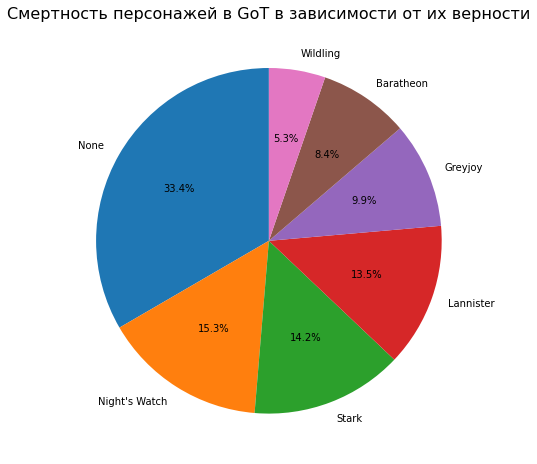

In [ ]:
game_of_thrones_df = pd.read_csv('/content/sample_data/character-deaths.csv')
game_of_thrones_df['Allegiances'] = game_of_thrones_df['Allegiances'].str.replace('House ', '')

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
deaths_count = game_of_thrones_df['Allegiances'].value_counts().sort_values(ascending=False).head(7)
pie = ax.pie(
    deaths_count,
    labels=deaths_count.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Смертность персонажей в GoT в зависимости от их верности', fontsize=16)
plt.show(pie)

Диаграмма представляет собой круг, разделенный на сектора. Весь круг составляет 100%. Каждый из секторов отображает долю одной из категорий в данных и размер сектора соответствует части целого от круга. 

Диаграмма является способом визуализации для категориального признака, например, можно визуализировать и сравнивать доли от выручки, которые делает каждый продавец. 

Однако специалисты и эксперты по визуализации обычно сторонятся круговых диаграмм и предпочитают им столбчатые диаграммы. Главная причина - столбчатые диаграммы могут быть более информативными.




---


## СТОЛБЧАТАЯ ДИАГРАММА (BAR CHART)

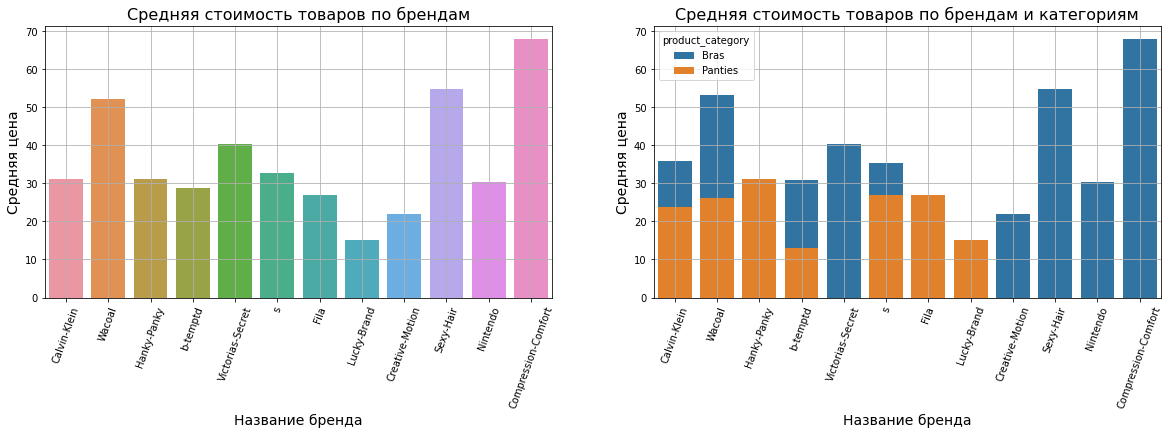

In [ ]:
amazon_data = pd.read_csv('/content/sample_data/amazon_com.csv')

def replace_url(brand_name):
    if 'ref=' in brand_name:
        if 'Calvin' in brand_name:
            return 'Calvin-Klein'
        elif 'Wacoal' in brand_name:
            return 'Wacoal'
        else:
            return 'b-temptd'
    else:
        return brand_name
    
amazon_data['brand_name'] = amazon_data['brand_name'].apply(replace_url)
amazon_data['price'] = amazon_data['price'].str.replace('$', '', regex=True).astype('float64')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
barplot1 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    orient='v',
    ax = axes[0],
    ci=None
)
barplot1.tick_params(axis='x', rotation=70);
barplot1.set_title('Средняя стоимость товаров по брендам', fontsize=16);
barplot1.set_xlabel('Название бренда', fontsize=14);
barplot1.set_ylabel('Средняя цена', fontsize=14);
barplot1.grid()

barplot2 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    hue='product_category',
    orient='v',
    ax = axes[1],
    ci=None,
    dodge=False
)
barplot2.tick_params(axis='x', rotation=70);
barplot2.set_title('Средняя стоимость товаров по брендам и категориям', fontsize=16);
barplot2.set_xlabel('Название бренда', fontsize=14);
barplot2.set_ylabel('Средняя цена', fontsize=14);
barplot2.grid()

Столбчатая диаграмма тоже максимально проста: по оси x откладывается некоторый категориальный признак, для каждой категории которого рассчитан некоторый показатель (средняя цена товаров, медианная стоимость нефти, максимальная зафиксированная концентрация газа). Высота столбца и есть значение этого показателя. 

Основное применение столбчатых диаграмм в Data Science - это сравнить категории друг с другом. Например, сравнить рестораны по суммарной прибыли, сравнить средние расходы пользователей, медианную стоимость квартир по районам и т.д. 

Преимущество столбчатых диаграмм над круговыми в том, что в столбчатые диаграммы можно добавлять разделение по другим категориальным признакам и рассматривать совместное распределение показателей, тем самым, повышая информативность. Такие диаграммы называются многоуровневыми.




---


## ТЕПЛОВАЯ КАРТА (HEATMAP)

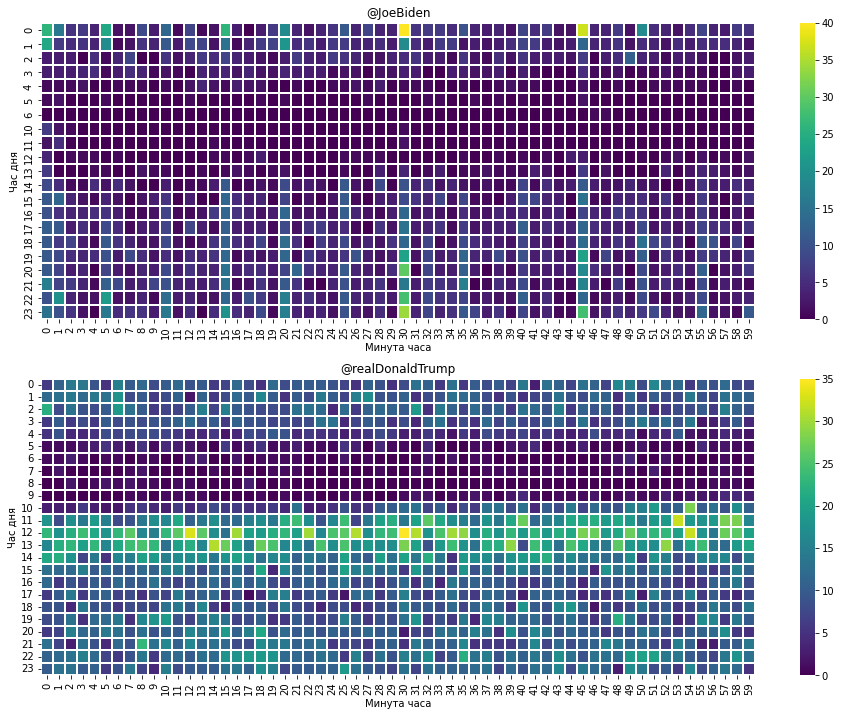

In [ ]:
tweets_df = pd.read_csv("https://bit.ly/3cngqgL", 
                 parse_dates=['date_utc'], 
                 dtype={'hour_utc':int,'minute_utc':int,'id':str}
                )
g = tweets_df.groupby(['hour_utc','minute_utc','username'])
tweet_cnt = g.id.nunique()
jb_tweet_cnt = tweet_cnt.loc[:,:,'JoeBiden'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
dt_tweet_cnt = tweet_cnt.loc[:,:,'realDonaldTrump'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
jb_heatmap = sns.heatmap(
    jb_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[0]
)
jb_heatmap.set_title('@JoeBiden');
jb_heatmap.set_xlabel('Минута часа');
jb_heatmap.set_ylabel('Час дня');

dt_heatmap = sns.heatmap(
    dt_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[1]
)

dt_heatmap.set_title('@realDonaldTrump');
dt_heatmap.set_xlabel('Минута часа');
dt_heatmap.set_ylabel('Час дня');

Тепловая карта - это графическое представление некоторой таблицы, где значения в ячейках таблицы выделяются определенным цветом или интенсивностью цвета. Таблицей может быть как DataFrame, так и, например, изображение.

Применение тепловых карты очень различно: от визуализации категорий объектов на изображениях до графического представления матриц. При исследовании табличных данных они чаще всего применяются для визуализации сводных таблиц.




---

# 3. Знакомимся с новыми данными: коронавирус

In [ ]:
covid_data = pd.read_csv('/content/sample_data/covid_data.csv')
display(covid_data.head())

date province/state country  confirmed  deaths  recovered
0  01/22/2020          Anhui   China        1.0     0.0        0.0
1  01/22/2020        Beijing   China       14.0     0.0        0.0
2  01/22/2020      Chongqing   China        6.0     0.0        0.0
3  01/22/2020         Fujian   China        1.0     0.0        0.0
4  01/22/2020          Gansu   China        0.0     0.0        0.0

In [ ]:
vaccinations_data = pd.read_csv('/content/sample_data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
vaccinations_data.head()

country        date  total_vaccinations  people_vaccinated  \
0  Afghanistan  2021-02-22                 0.0                0.0   
1  Afghanistan  2021-02-23                 NaN                NaN   
2  Afghanistan  2021-02-24                 NaN                NaN   
3  Afghanistan  2021-02-25                 NaN                NaN   
4  Afghanistan  2021-02-26                 NaN                NaN   

   people_vaccinated_per_hundred  people_fully_vaccinated  \
0                            0.0                      NaN   
1                            NaN                      NaN   
2                            NaN                      NaN   
3                            NaN                      NaN   
4                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations  \
0                                  NaN                 NaN   
1                                  NaN              1367.0   
2                                  NaN              1367.0   
3                                  NaN              1367.0   
4                                  NaN              1367.0   

                                            vaccines  
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...

In [ ]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

In [ ]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [ ]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

In [ ]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [ ]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [ ]:
# Задание 3.1
covid_data['date'].min()

Timestamp('2020-01-22 00:00:00')

In [ ]:
covid_data['date'].max()

Timestamp('2021-05-29 00:00:00')

In [ ]:
# Задание 3.2
vaccinations_data['date'].min()

Timestamp('2020-12-02 00:00:00')

In [ ]:
vaccinations_data['date'].max()

Timestamp('2021-09-06 00:00:00')

In [ ]:
# Задание 3.3
covid_df = covid_data.merge(vaccinations_data,
    on=['date', 'country'],
    how='left'
)
covid_df.shape

(86785, 16)

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
covid_df.to_csv('covid_df.csv')
!cp covid_df.csv "/content/sample_data"



---



In [ ]:
covid_data1 = pd.read_csv('/content/sample_data/covid_df.csv')
display(covid_data1.head())

Unnamed: 0        date      country  confirmed  deaths  recovered  active  \
0           0  2020-02-24  Afghanistan        1.0     0.0        0.0     1.0   
1           1  2020-02-25  Afghanistan        1.0     0.0        0.0     1.0   
2           2  2020-02-26  Afghanistan        1.0     0.0        0.0     1.0   
3           3  2020-02-27  Afghanistan        1.0     0.0        0.0     1.0   
4           4  2020-02-28  Afghanistan        1.0     0.0        0.0     1.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              0.0           0.0              0.0                 NaN   
2              0.0           0.0              0.0                 NaN   
3              0.0           0.0              0.0                 NaN   
4              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  \
0                                  NaN                 NaN      NaN   
1                                  NaN                 NaN      NaN   
2                                  NaN                 NaN      NaN   
3                                  NaN                 NaN      NaN   
4                                  NaN                 NaN      NaN   

   death_rate  recover_rate  
0         0.0           0.0  
1         0.0           0.0  
2         0.0           0.0  
3         0.0           0.0  
4         0.0           0.0



---



In [ ]:
# В получившейся в задании 3.3 таблице covid_df создайте признаки 
# death_rate — общий процент смертей среди зафиксированных случаев (летальность) и 
# recover_rate — общий процент случаев выздоровления. 
# Данные характеристики рассчитайте как отношение числа смертей (deaths) и 
# числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и 
# умножьте результаты на 100%.
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100

In [ ]:
# Задание 3.4
# Какова максимальная летальность в США (United States) за весь период? 
# Ответ округлите до второго знака после запятой.
mask_us = covid_df['country'] == 'United States'
covid_df[mask_us]['death_rate'].max().round(2)

7.19

In [ ]:
# Задание 3.5
# Чему равен средний процент выздоровевших в России (Russia)? 
# Ответ округлите до второго знака после запятой.
mask_rf = covid_df['country'] == 'Russia'
covid_df[mask_rf]['recover_rate'].mean().round(2)

67.06



---

# 4. Графические возможности библиотеки Pandas

БАЗОВАЯ ВИЗУАЛИЗАЦИЯ В PANDAS

Основным методом для создания простейших графиков в Pandas является метод plot(). Разберем его основные параметры:
* x - название признака, который будет отложен по оси абсцисс
* y - название признака, который будет отложен по оси ординат
* figsize - размер графика (кортеж из ширины и высоты в дюймах)
* **kind** - тип визуализации. Основные типы:
    * 'line' - линейный график (стоит по умолчанию)
    * 'bar' - столбчатая диаграмма
    * 'barh' - горизонтальная столбчатая диаграмма
    * 'hist' - гистограмма
    * 'box' - коробчатая диаграмма (boxplot)
    * 'pie' - круговая диаграмма
    * 'scatter' - диаграмма рассеяния
* grid - отображение сетки (по умолчанию False)
* legend - отображение легенды (по умолчанию False)
* title - название графика
* color - цвет

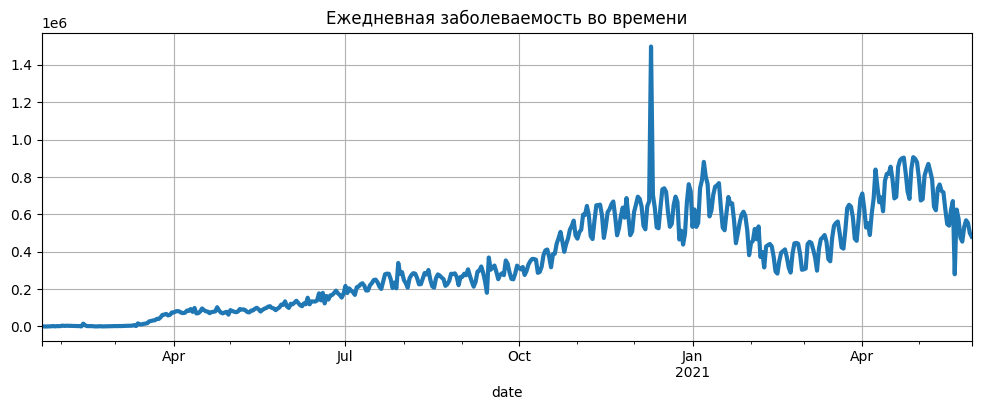

In [ ]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

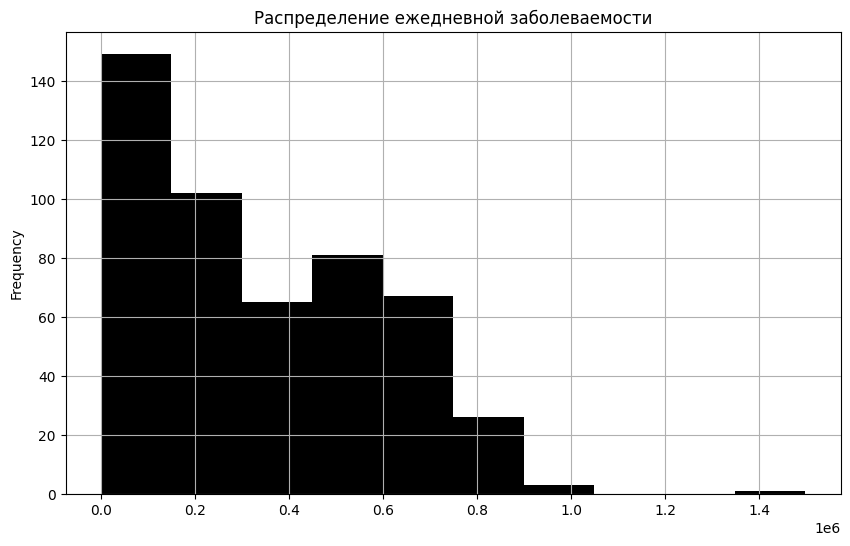

In [ ]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

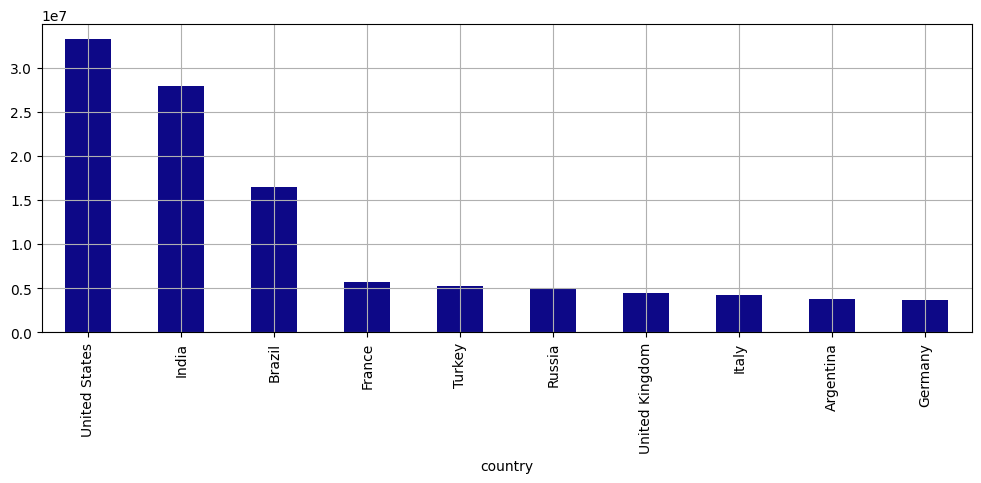

In [ ]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

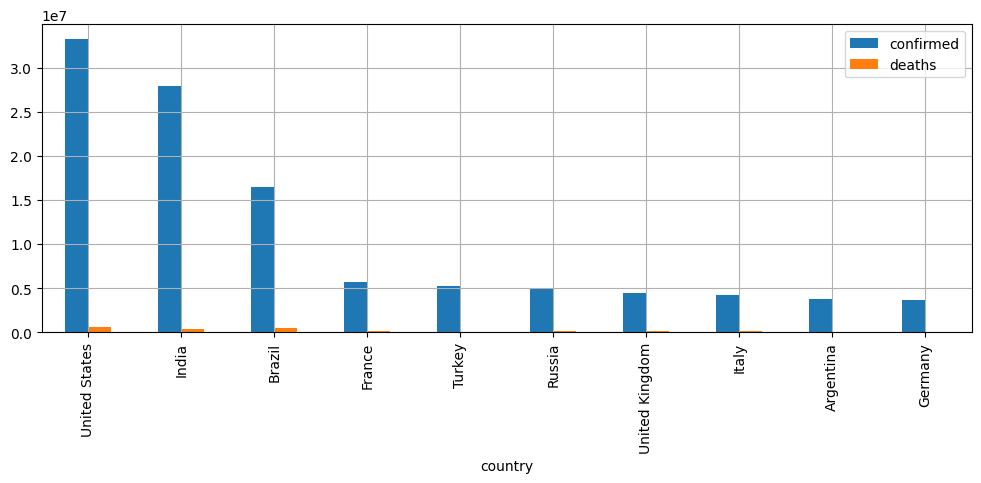

In [ ]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);

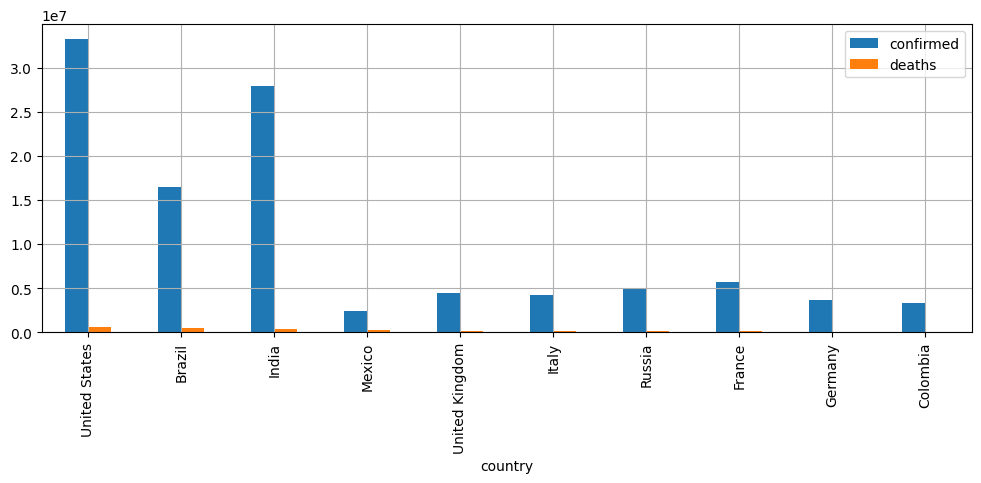

In [ ]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['deaths'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);



---



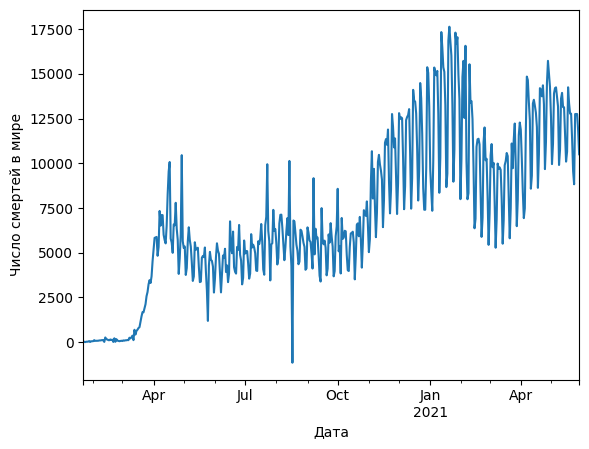

In [ ]:
# Задание 4.3
grouped_cases = covid_df.groupby('date')['daily_deaths'].sum()
grouped_cases.plot(kind='line',xlabel='Дата', ylabel='Число смертей в мире');

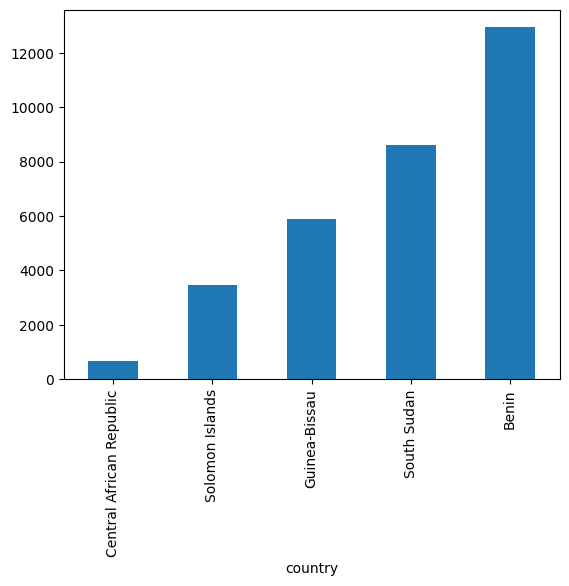

In [ ]:
# Задание 4.4
# С помощью какого из перечисленных ниже вариантов кода можно построить 
# столбчатую диаграмму для пяти стран с наименьшим общим числом вакцинаций 
# на последний день рассматриваемого периода (total_vaccinations)?
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');



---

# 5. Графические возможности библиотеки Matplotlib

НЕМНОГО О БИБЛИОТЕКЕ

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.style.use('default')

In [3]:
covid_df = pd.read_csv('/content/sample_data/covid_df.csv')
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head()

Unnamed: 0       date      country  confirmed  deaths  recovered  active  \
0           0 2020-02-24  Afghanistan        1.0     0.0        0.0     1.0   
1           1 2020-02-25  Afghanistan        1.0     0.0        0.0     1.0   
2           2 2020-02-26  Afghanistan        1.0     0.0        0.0     1.0   
3           3 2020-02-27  Afghanistan        1.0     0.0        0.0     1.0   
4           4 2020-02-28  Afghanistan        1.0     0.0        0.0     1.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              0.0           0.0              0.0                 NaN   
2              0.0           0.0              0.0                 NaN   
3              0.0           0.0              0.0                 NaN   
4              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  \
0                                  NaN                 NaN      NaN   
1                                  NaN                 NaN      NaN   
2                                  NaN                 NaN      NaN   
3                                  NaN                 NaN      NaN   
4                                  NaN                 NaN      NaN   

   death_rate  recover_rate  
0         0.0           0.0  
1         0.0           0.0  
2         0.0           0.0  
3         0.0           0.0  
4         0.0           0.0

ОСНОВНЫЕ ОБЪЕКТЫ MATPLOTLIB

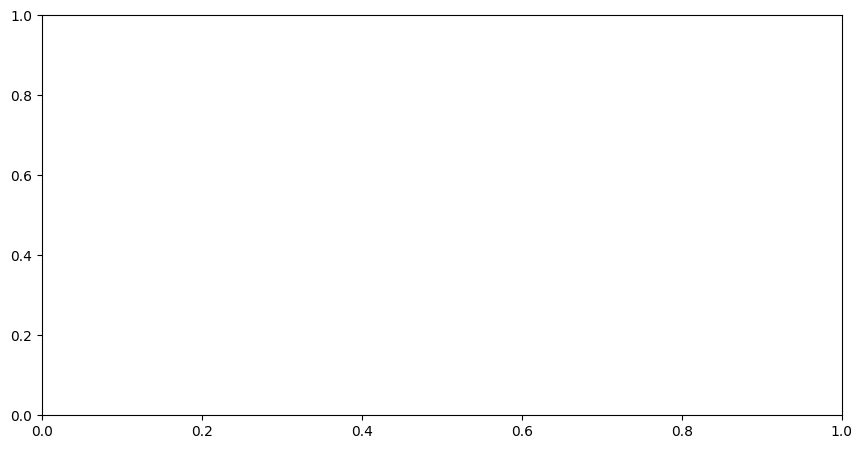

In [ ]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])



---


Основные параметры метода scatter():
* x, y — последовательности, которые будут отложены по осям абсцисс и ординат;
* s — размер маркеров;
* marker — вид маркеров ('o' — точки, '^' — треугольники);
* c — цвет маркеров.

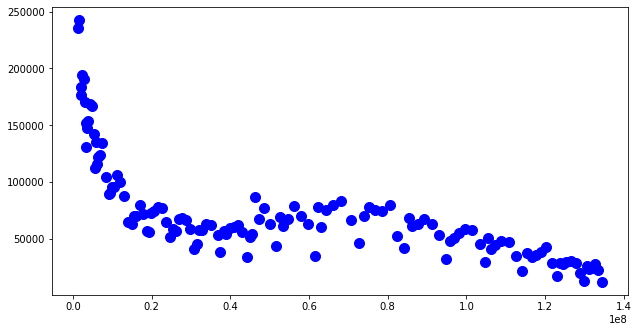

In [ ]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
);



---


Основные параметры метода pie():
* x — значения, по которым будет строиться круговая диаграмма;
* labels — метки, соответствующие значениям;
* autopct — формат отображения долей на диаграмме (например, '%.1f%%' означает, что округление будет производиться до первого знака после запятой и при выводе будет указан знак "%"; открывающий и закрывающий проценты означают форматирование, а внутренний — вывод знака "%");
* explode — последовательность, которая определяет долю смещения сектора от центра для каждого значения из x.

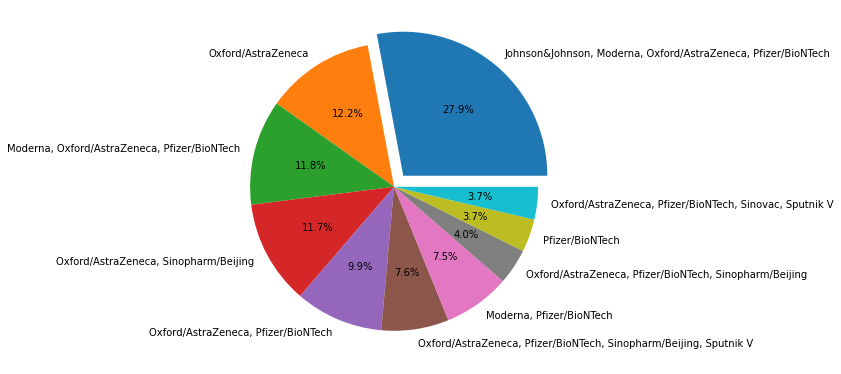

In [ ]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

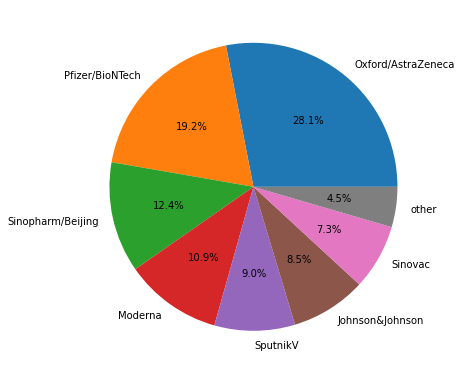

In [ ]:
#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);



---


ДОБАВЛЕНИЕ ИНФОРМАТИВНОСТИ В ГРАФИКИ

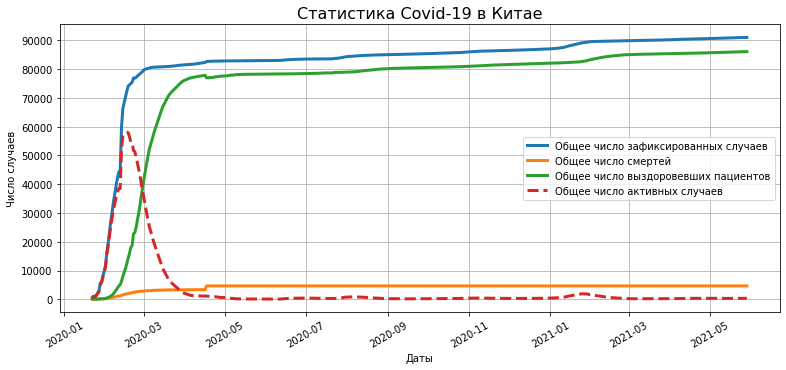

In [ ]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();



---


ИСПОЛЬЗОВАНИЕ НЕСКОЛЬКИХ СИСТЕМ КООРДИНАТ

Основные параметры метода bar():
* x — названия категорий, которые будут располагаться по оси абсцисс;
* height — высота столбцов диаграммы, массив из показателей для визуализации (например, среднее, максимальное значение и т. д.);
* width — ширина столбцов диаграммы;
* color — цвет.

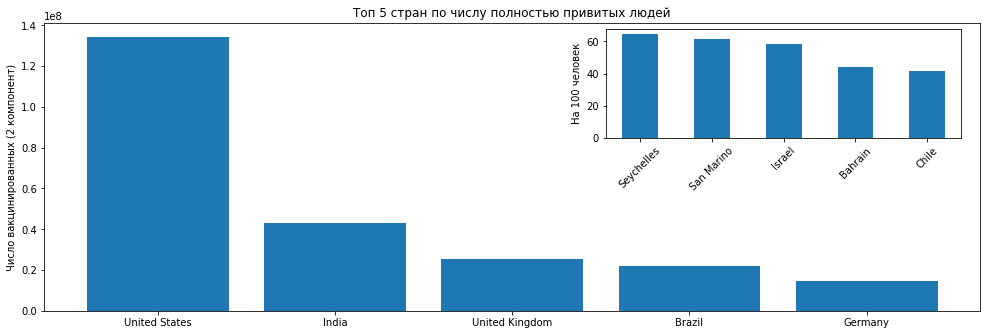

In [ ]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)



---


SUBPLOTS

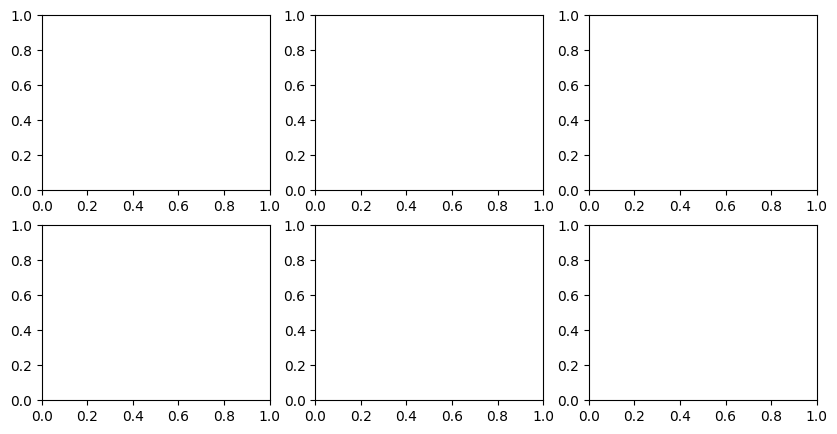

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))



---

Основные параметры метода hist():
* x — массив чисел, для которого строится гистограмма;
* bins — число столбцов (корзин);
* orientation — ориентация гистограммы (по умолчанию 'vertical');
* color — цвет.

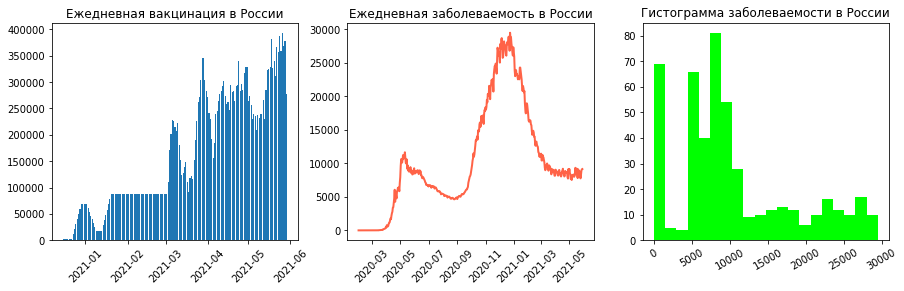

In [ ]:
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)



---

модульный подход

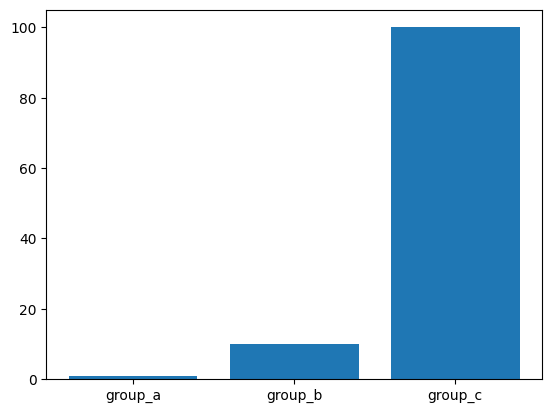

In [ ]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)
plt.show()



---



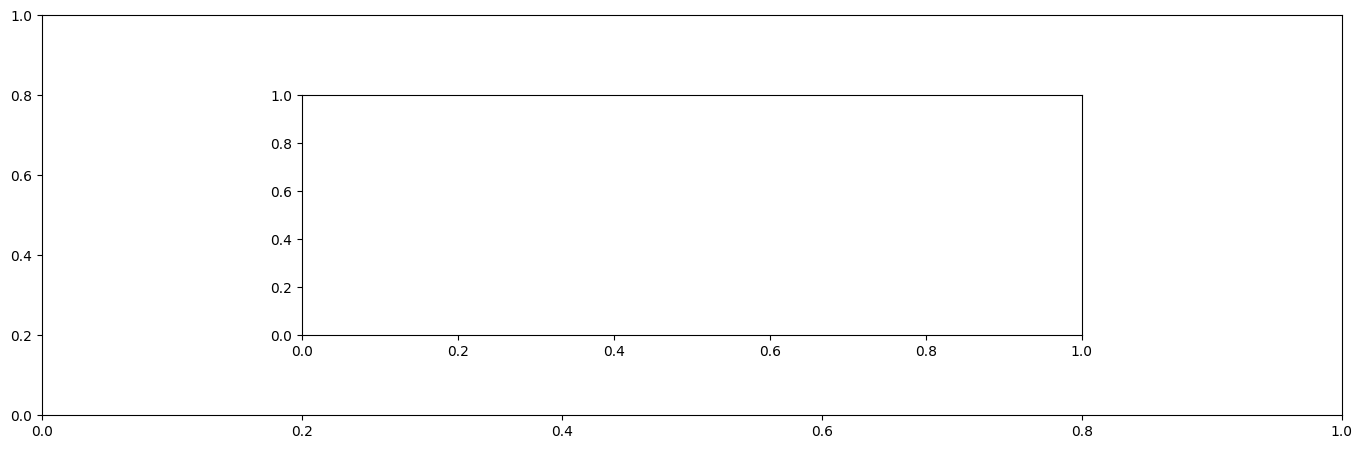

In [ ]:
# Задание 5.5
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.2, 0.2, 0.6, 0.6])

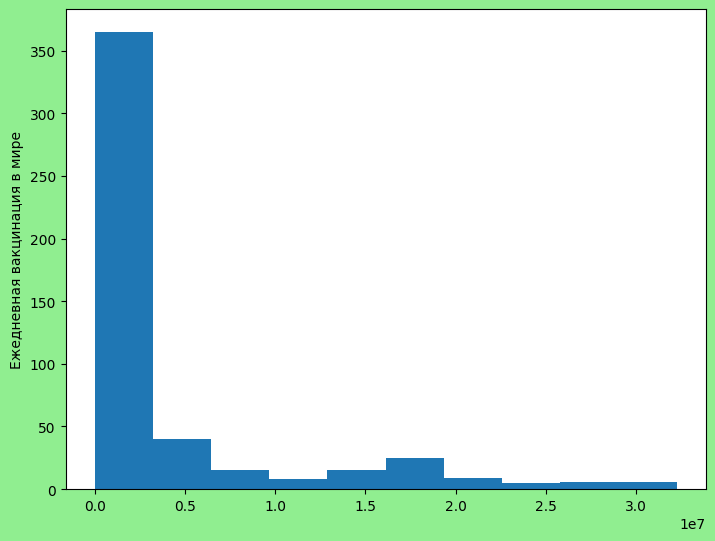

In [ ]:
# Задание 5.6
fig = plt.figure(facecolor='lightgreen')
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(covid_df.groupby('date')['daily_vaccinations'].sum())
axes.set_ylabel('Ежедневная вакцинация в мире');

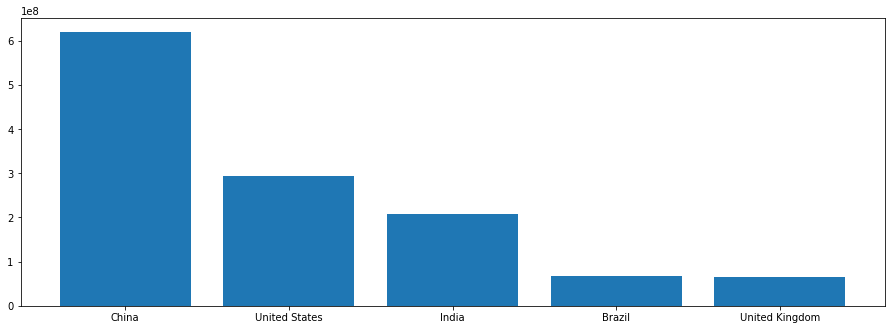

In [ ]:
# Задание 5.7
v = covid_df.groupby(['country'])['total_vaccinations'].last().nlargest(5)
fig = plt.figure(figsize=(12, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x=v.index,height=v);



---

# 6. Графические возможности библиотеки Seaborn

In [ ]:
import seaborn as sns
print(sns.__version__)

0.11.2


In [ ]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

date    country  confirmed  deaths  recovered  active  \
0 2020-01-23  Australia        0.0     0.0        0.0     0.0   
1 2020-01-25  Australia        4.0     0.0        0.0     4.0   
2 2020-01-26  Australia        4.0     0.0        0.0     4.0   
3 2020-01-27  Australia        5.0     0.0        0.0     5.0   
4 2020-01-28  Australia        5.0     0.0        0.0     5.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              4.0           0.0              0.0                 NaN   
2              0.0           0.0              0.0                 NaN   
3              1.0           0.0              0.0                 NaN   
4              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  \
0                                  NaN                 NaN      NaN   
1                                  NaN                 NaN      NaN   
2                                  NaN                 NaN      NaN   
3                                  NaN                 NaN      NaN   
4                                  NaN                 NaN      NaN   

   death_rate  recover_rate  population  daily_confirmed_per_hundred  
0         NaN           NaN    25726900                          NaN  
1         0.0           0.0    25726900                     0.000016  
2         0.0           0.0    25726900                     0.000000  
3         0.0           0.0    25726900                     0.000004  
4         0.0           0.0    25726900                     0.000000

Основные параметры метода histplot()
* data — DataFrame, по которому строится график;
* x — признак, который будет отложен по оси абсцисс;
* y — признак, который будет отложен по оси ординат;
* hue — группировочный категориальный признак, который позволяет строить отдельный график для каждой категории (не стоит использовать его для гистограмм, но он широко используется для других видов графиков в Seaborn);
* ax — система координат Matplotlib, в которой строится график;
* color — цвет графика;
* bins — число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул);
* kde — параметр, указывающий, стоит ли сглаживать гистограмму кривой (по умолчанию False).

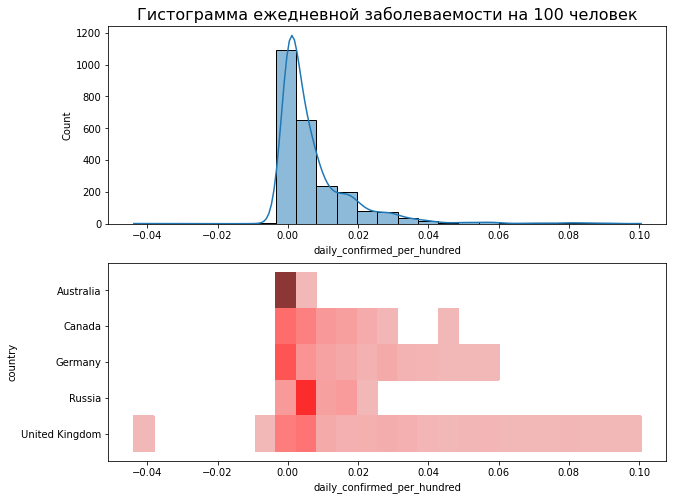

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

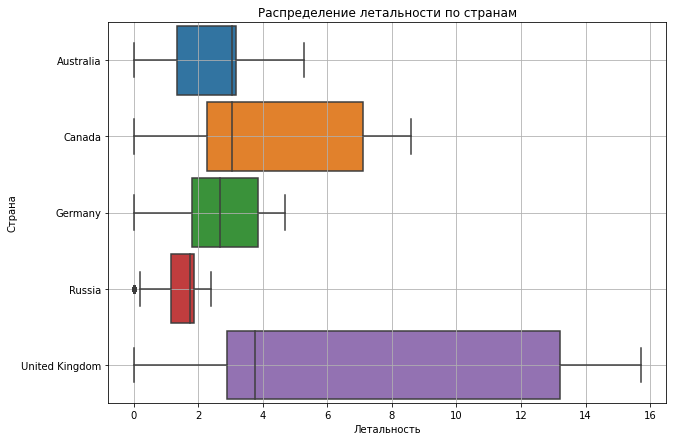

In [ ]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

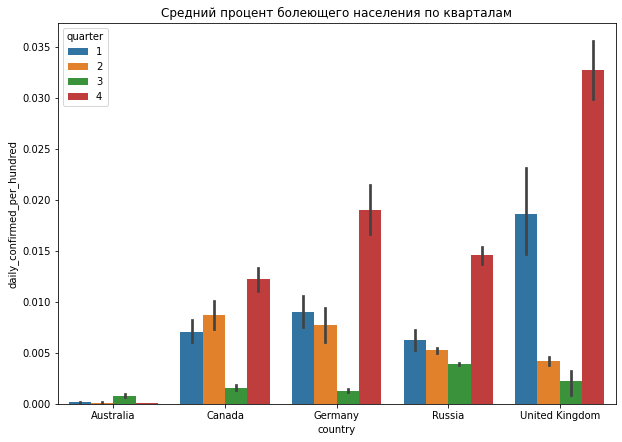

In [ ]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');

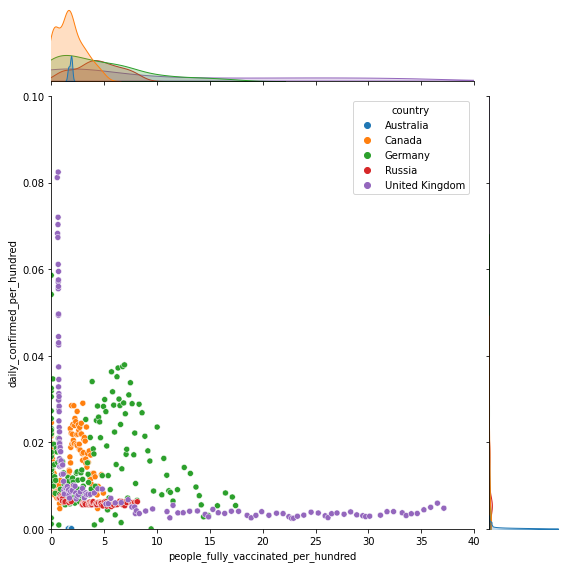

In [ ]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

In [ ]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date            2020-12-13  2020-12-14  2020-12-15  2020-12-16  2020-12-17  \
country                                                                      
Australia              NaN         NaN         NaN         NaN         NaN   
Canada                 NaN         0.0        0.00        0.01        0.02   
Germany                NaN         NaN         NaN         NaN         NaN   
Russia                 NaN         NaN        0.02         NaN         NaN   
United Kingdom        0.13         NaN         NaN         NaN         NaN   

date            2020-12-18  2020-12-19  2020-12-20  2020-12-21  2020-12-22  \
country                                                                      
Australia              NaN         NaN         NaN         NaN         NaN   
Canada                0.03        0.03        0.03        0.05        0.07   
Germany                NaN         NaN         NaN         NaN         NaN   
Russia                 NaN         NaN         NaN         NaN        0.04   
United Kingdom         NaN         NaN        0.99         NaN         NaN   

date            ...  2021-05-20  2021-05-21  2021-05-22  2021-05-23  \
country         ...                                                   
Australia       ...         NaN         NaN         NaN         NaN   
Canada          ...       48.10       49.25       50.14       50.89   
Germany         ...       39.18       39.68       39.95       40.11   
Russia          ...       10.20       10.30       10.50       10.53   
United Kingdom  ...       55.01       55.33       55.63       55.82   

date            2021-05-24  2021-05-25  2021-05-26  2021-05-27  2021-05-28  \
country                                                                      
Australia            12.40       12.69       12.88       13.28       13.73   
Canada               51.77       52.39       53.05       53.95       54.99   
Germany              40.29       40.64       41.29       41.87       42.40   
Russia               10.70       10.81       11.07       11.12       11.19   
United Kingdom       55.99       56.27       56.61       56.99       57.29   

date            2021-05-29  
country                     
Australia            14.18  
Canada               55.71  
Germany              42.61  
Russia               11.29  
United Kingdom       57.56  

[5 rows x 168 columns]

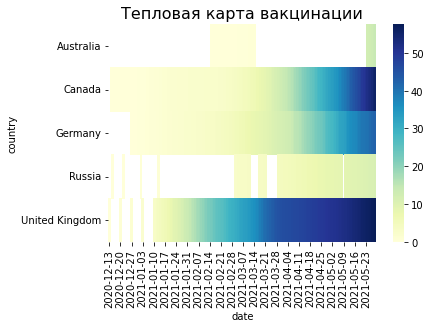

In [ ]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

In [ ]:
# Задание 6.4
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed']/croped_covid_df['population']*100

In [ ]:
croped_covid_df

date         country  confirmed    deaths  recovered     active  \
0    2020-01-23       Australia        0.0       0.0        0.0        0.0   
1    2020-01-25       Australia        4.0       0.0        0.0        4.0   
2    2020-01-26       Australia        4.0       0.0        0.0        4.0   
3    2020-01-27       Australia        5.0       0.0        0.0        5.0   
4    2020-01-28       Australia        5.0       0.0        0.0        5.0   
...         ...             ...        ...       ...        ...        ...   
2435 2021-05-25  United Kingdom  4483177.0  128001.0    15453.0  4339723.0   
2436 2021-05-26  United Kingdom  4486168.0  128010.0    15477.0  4342681.0   
2437 2021-05-27  United Kingdom  4489552.0  128020.0    15480.0  4346052.0   
2438 2021-05-28  United Kingdom  4493582.0  128030.0    15480.0  4350072.0   
2439 2021-05-29  United Kingdom  4496823.0  128037.0    15481.0  4353305.0   

      daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  ...  \
0                 NaN           NaN              NaN                 NaN  ...   
1                 4.0           0.0              0.0                 NaN  ...   
2                 0.0           0.0              0.0                 NaN  ...   
3                 1.0           0.0              0.0                 NaN  ...   
4                 0.0           0.0              0.0                 NaN  ...   
...               ...           ...              ...                 ...  ...   
2435           2417.0          15.0              8.0          61995062.0  ...   
2436           2991.0           9.0             24.0          62658639.0  ...   
2437           3384.0          10.0              3.0          63349252.0  ...   
2438           4030.0          10.0              0.0          63989645.0  ...   
2439           3241.0           7.0              1.0          64592019.0  ...   

      people_fully_vaccinated  people_fully_vaccinated_per_hundred  \
0                         NaN                                  NaN   
1                         NaN                                  NaN   
2                         NaN                                  NaN   
3                         NaN                                  NaN   
4                         NaN                                  NaN   
...                       ...                                  ...   
2435               23616498.0                                34.62   
2436               24043956.0                                35.25   
2437               24478052.0                                35.89   
2438               24914003.0                                36.53   
2439               25332851.0                                37.14   

      daily_vaccinations                                      vaccines  \
0                    NaN                                           NaN   
1                    NaN                                           NaN   
2                    NaN                                           NaN   
3                    NaN                                           NaN   
4                    NaN                                           NaN   
...                  ...                                           ...   
2435            591301.0  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
2436            595544.0  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
2437            595836.0  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
2438            594987.0  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
2439            572132.0  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   

      death_rate recover_rate  population  daily_confirmed_per_hundred  \
0            NaN          NaN    25726900                          NaN   
1       0.000000     0.000000    25726900                     0.000016   
2       0.000000     0.000000    25726900                     0.000000   
3       0.000000     0.000000    25726900                     0.000004   
4

In [ ]:
pivot2 = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country',
)
pivot2.columns = pivot2.columns.astype('string')
display(pivot2)

date            2020-01-23  2020-01-25  2020-01-26  2020-01-27  2020-01-28  \
country                                                                      
Australia              0.0    0.000016    0.000016    0.000019    0.000019   
Canada                 NaN         NaN    0.000003    0.000003    0.000005   
Germany                NaN         NaN         NaN         NaN    0.000005   
Russia                 NaN         NaN         NaN         NaN         NaN   
United Kingdom         NaN         NaN         NaN         NaN         NaN   

date            2020-01-29  2020-01-30  2020-01-31  2020-02-01  2020-02-02  \
country                                                                      
Australia         0.000019    0.000035    0.000035    0.000047    0.000047   
Canada            0.000005    0.000008    0.000008    0.000011    0.000011   
Germany           0.000005    0.000005    0.000006    0.000010    0.000012   
Russia                 NaN         NaN    0.000001    0.000001    0.000001   
United Kingdom         NaN         NaN    0.000003    0.000003    0.000003   

date            ...  2021-05-20  2021-05-21  2021-05-22  2021-05-23  \
country         ...                                                   
Australia       ...    0.116606    0.116621    0.116637    0.116683   
Canada          ...    3.599497    3.611526    3.620169    3.628017   
Germany         ...    4.345962    4.355632    4.363299    4.368845   
Russia          ...    3.368999    3.375035    3.380916    3.386963   
United Kingdom  ...    6.594230    6.598223    6.601946    6.605033   

date            2021-05-24  2021-05-25  2021-05-26  2021-05-27  2021-05-28  \
country                                                                      
Australia         0.116722    0.116788    0.116854    0.116897    0.116932   
Canada            3.632706    3.642529    3.648718    3.661252    3.669520   
Germany           4.371625    4.374704    4.380047    4.388347    4.395716   
Russia            3.392637    3.397954    3.403604    3.409708    3.415960   
United Kingdom    6.608528    6.612093    6.616504    6.621495    6.627439   

date            2021-05-29  
country                     
Australia         0.116983  
Canada            3.675536  
Germany           4.401106  
Russia            3.422232  
United Kingdom    6.632219  

[5 rows x 492 columns]

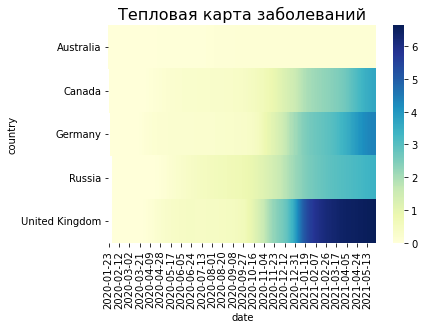

In [ ]:
heatmap = sns.heatmap(data=pivot2, cmap='YlGnBu')
heatmap.set_title('Тепловая карта заболеваний', fontsize=16);

In [ ]:
# Задание 6.5
croped_covid_df['recover_rate']

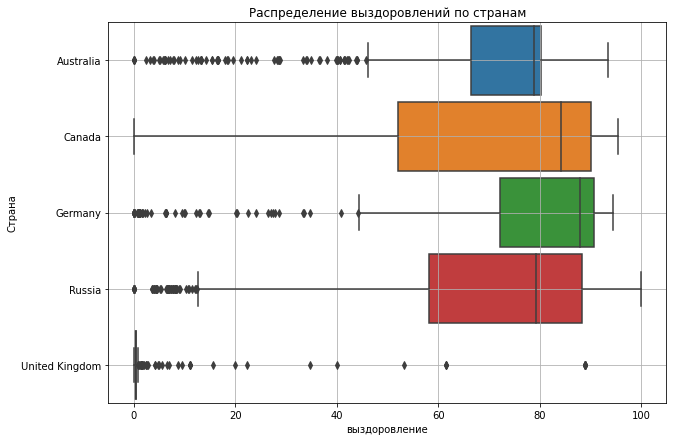

In [ ]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение выздоровлений по странам');
boxplot.set_xlabel('выздоровление');
boxplot.set_ylabel('Страна');
boxplot.grid()

In [ ]:
covid_df.to_csv('covid_df.csv')
!cp covid_df.csv "/content/sample_data"

In [ ]:
croped_covid_df.to_csv('croped_covid_df.csv')
!cp croped_covid_df.csv "/content/sample_data"



---

# 7. Графические возможности библиотеки Plotly

In [4]:
covid_df = pd.read_csv('/content/sample_data/covid_df.csv')
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head()

Unnamed: 0       date      country  confirmed  deaths  recovered  active  \
0           0 2020-02-24  Afghanistan        1.0     0.0        0.0     1.0   
1           1 2020-02-25  Afghanistan        1.0     0.0        0.0     1.0   
2           2 2020-02-26  Afghanistan        1.0     0.0        0.0     1.0   
3           3 2020-02-27  Afghanistan        1.0     0.0        0.0     1.0   
4           4 2020-02-28  Afghanistan        1.0     0.0        0.0     1.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              0.0           0.0              0.0                 NaN   
2              0.0           0.0              0.0                 NaN   
3              0.0           0.0              0.0                 NaN   
4              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  \
0                                  NaN                 NaN      NaN   
1                                  NaN                 NaN      NaN   
2                                  NaN                 NaN      NaN   
3                                  NaN                 NaN      NaN   
4                                  NaN                 NaN      NaN   

   death_rate  recover_rate  
0         0.0           0.0  
1         0.0           0.0  
2         0.0           0.0  
3         0.0           0.0  
4         0.0           0.0

In [5]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.5.0


Основные параметры метода line():
* data_frame — DataFrame, по которому строится график;
* x — признак по оси абсцисс;
* y — признак по оси ординат;
* height — высота графика;
* width — ширина графика;
* title — название графика.

In [6]:
line_data = covid_df.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame=line_data, #DataFrame
    x='date', #ось абсцисс
    y=['confirmed', 'recovered', 'deaths', 'active'], #ось ординат
    height=500, #высота
    width=1000, #ширина
    title='Confirmed, Recovered, Deaths, Active cases over Time' #заголовок
)
fig.show()

In [7]:
#считаем средний процент выздоровлений для каждой страны
bar_data = covid_df.groupby(
    by='country',
    as_index=False
)[['recover_rate']].mean().round(2).nlargest(10, columns=['recover_rate'])

#строим график
fig = px.bar(
    data_frame=bar_data, #датафрейм
    x="country", #ось x
    y="recover_rate", #ось y
    color='country', #расцветка в зависимости от страны
    text = 'recover_rate', #текст на столбцах
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='Top 10 Countries for Recovery Rate' #заголовок
)

#отображаем его
fig.show()

Основные параметры метода treemap():
* data_frame — DataFrame, по которому строится график;
* path — категориальные признаки (их может быть несколько), в разрезе которых строится диаграмма;
* values — показатель, по которому рассчитываются размеры прямоугольников.

In [8]:
#считаем среднее ежедневно фиксируемое количество выздоровевших по странам
treemap_data = covid_df.groupby(
    by='country',
    as_index=False
)[['daily_recovered']].mean()

#строим график
fig = px.treemap(
    data_frame=treemap_data, #DataFrame
    path=['country'], #категориальный признак, для которого строится график
    values='daily_recovered', #параметр, который сравнивается
    height=500, #высота
    width=1000, #ширина
    title='Daily Recovered Cases by Country' #заголовок
)

#отображаем график
fig.show()



---


АНИМАЦИЯ ГРАФИКОВ ВО ВРЕМЕНИ

In [9]:
#преобразуем даты в строковый формат
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="confirmed", #от чего зависит цвет
    animation_frame="date", #анимационный бегунок
    range_color=[0, 30e6], #диапазон цвета
    title='Global Spread of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()



---


ТРЁХМЕРНАЯ ВИЗУАЛИЗАЦИЯ

In [11]:
#фильтруем таблицу по странам
countries=['United States', 'Russia', 'United Kingdom', 'Brazil', 'France']
scatter_data = covid_df[covid_df['country'].isin(countries)]

#строим график
fig = px.scatter_3d(
    data_frame=scatter_data, #DataFrame
    x = 'daily_confirmed', #ось абсцисс
    y = 'daily_deaths', #ось ординат
    z = 'daily_vaccinations', #ось аппликат
    color='country', #расцветка в зависимости от страны
    log_x=True, 
    log_y=True,
    width=1000,
    height=700
)

#отображаем график
fig.show()

In [13]:
# Сохраним график трёхмерной диаграммы рассеяния:
fig.write_html("plotly/scatter_3d.html")

In [18]:
# Задание 7.4
# countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
# croped_covid_df = covid_df[covid_df['country'].isin(countries)]

# populations = pd.DataFrame([
#     ['Canada', 37664517],
#     ['Germany', 83721496],
#     ['Russia', 145975300],
#     ['Australia', 25726900],
#     ['United Kingdom', 67802690]
#     ],
#     columns=['country', 'population']
# )
# croped_covid_df = croped_covid_df.merge(populations, on=['country'])
# croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100

countries=['United States', 'Russia', 'United Kingdom', 'Brazil', 'France']
box_data = covid_df[covid_df['country'].isin(countries)]
fig = px.box(data_frame=box_data, x = 'daily_vaccinations', color='country')
fig.show()

In [22]:
# Задание 7.5
line_data = covid_df.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame=line_data, #DataFrame
    x='date', #ось абсцисс
    y=['daily_vaccinations'], #ось ординат
    height=500, #высота
    width=1000, #ширина
    title='daily_vaccinations over Time' #заголовок
)
fig.show()

In [26]:
# Задание 7.6
#преобразуем даты в строковый формат
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="total_vaccinations", #от чего зависит цвет
    animation_frame="date", #анимационный бегунок
    range_color=[0, 30e6], #диапазон цвета
    title='Global total_vaccinations', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()



---

# 8. Искусство визуализации



---

# 9. Закрепление знаний

In [27]:
churn_data = pd.read_csv('/content/sample_data/churn.csv')
churn_data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0